In [3]:
# this is going back to the OLD pacbio data, being used in thesis
import yaml
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
# make donut plots of PacBio barcode and read distribution for PKR variants, 220823MC
input_file = '../data/pacbio_211209/pkr/output/variants/pkr.codon_variant_table.csv'
protein = 'PKR'

win1 = [255,278]
win2 = [371,385]
win3 = [448,455]
win4 = [480,506]
pkr_win = {'win_1':win1, 'win_2':win2, 'win_3':win3, 'win_4':win4}
pkr_aa_pos = list(itertools.chain.from_iterable([list(range(val[0], val[1]+1)) for val in pkr_win.values()]))

In [5]:
df = pd.read_csv(input_file)

df['n_aa_substitutions'].value_counts()

# check where the variants are
df['variant_site'] = df[df['n_aa_substitutions'] == 1]['aa_substitutions'].str[1:-1].astype(int)

# see if sites are in pkr_aa_pos
df['variant_site'].isin(pkr_aa_pos)

# flag for desired variant  sites
df = df.assign(desired_variant=lambda x: x['variant_site'].isin(pkr_aa_pos))

# flag for synonymous_wt pkr
df = df.assign(synonymous_variant=lambda x: 
    ((x['aa_substitutions'].isnull()) &
    (x['codon_substitutions'].notnull()))
)

# count synonymous pkr variants
syn_var_bc = df.synonymous_variant.sum()
syn_var_reads = df[df.synonymous_variant == True].variant_call_support.sum()

# flag for wt pkr
df = df.assign(wt=lambda x: 
    ((x['aa_substitutions'].isnull()) &
    (x['codon_substitutions'].isnull()))
)

# count wt pkr
wt_bc = df.wt.sum()
wt_reads = df[df.wt == True].variant_call_support.sum()

# count 1-variant, not used
var_1_bc = (df.n_aa_substitutions == 1).sum()
var_1_reads = df[df.n_aa_substitutions == 1].variant_call_support.sum()

# intended single residue variants
intended_var_1_bc = ((df.n_aa_substitutions == 1) & (df.variant_site.isin(pkr_aa_pos))).sum()
intended_var_1_reads = df[(df.n_aa_substitutions == 1) & (df.variant_site.isin(pkr_aa_pos))].variant_call_support.sum()

# unintended single residue variants
unintended_var_1_bc = ((df.n_aa_substitutions == 1) & (~df.variant_site.isin(pkr_aa_pos))).sum()
unintended_var_1_reads = df[(df.n_aa_substitutions == 1) & (~df.variant_site.isin(pkr_aa_pos))].variant_call_support.sum()

# count >1 variant
var_n_bc = (df.n_aa_substitutions > 1).sum() # barcodes
var_n_reads = df[df.n_aa_substitutions > 1].variant_call_support.sum() # reads

In [14]:
intended_var_1_bc

69441

In [15]:
intended_var_1_bc/total_barcodes

0.8560281065088757

In [16]:
total_barcodes = sum([intended_var_1_bc, unintended_var_1_bc+var_n_bc, syn_var_bc, wt_bc])
print('Percent of barcodes linked to variant categories:')
print('Total barcodes:', total_barcodes)
print('% Select nonsynonymous variants:', intended_var_1_bc/total_barcodes)
print('% WT/Synonymous:', (syn_var_bc+wt_bc)/total_barcodes)
print('% Off-target variants:', (unintended_var_1_bc+var_n_bc)/total_barcodes)

Percent of barcodes linked to variant categories:
Total barcodes: 81120
% Select nonsynonymous variants: 0.8560281065088757
% WT/Synonymous: 0.08427021696252465
% Off-target variants: 0.059701676528599604


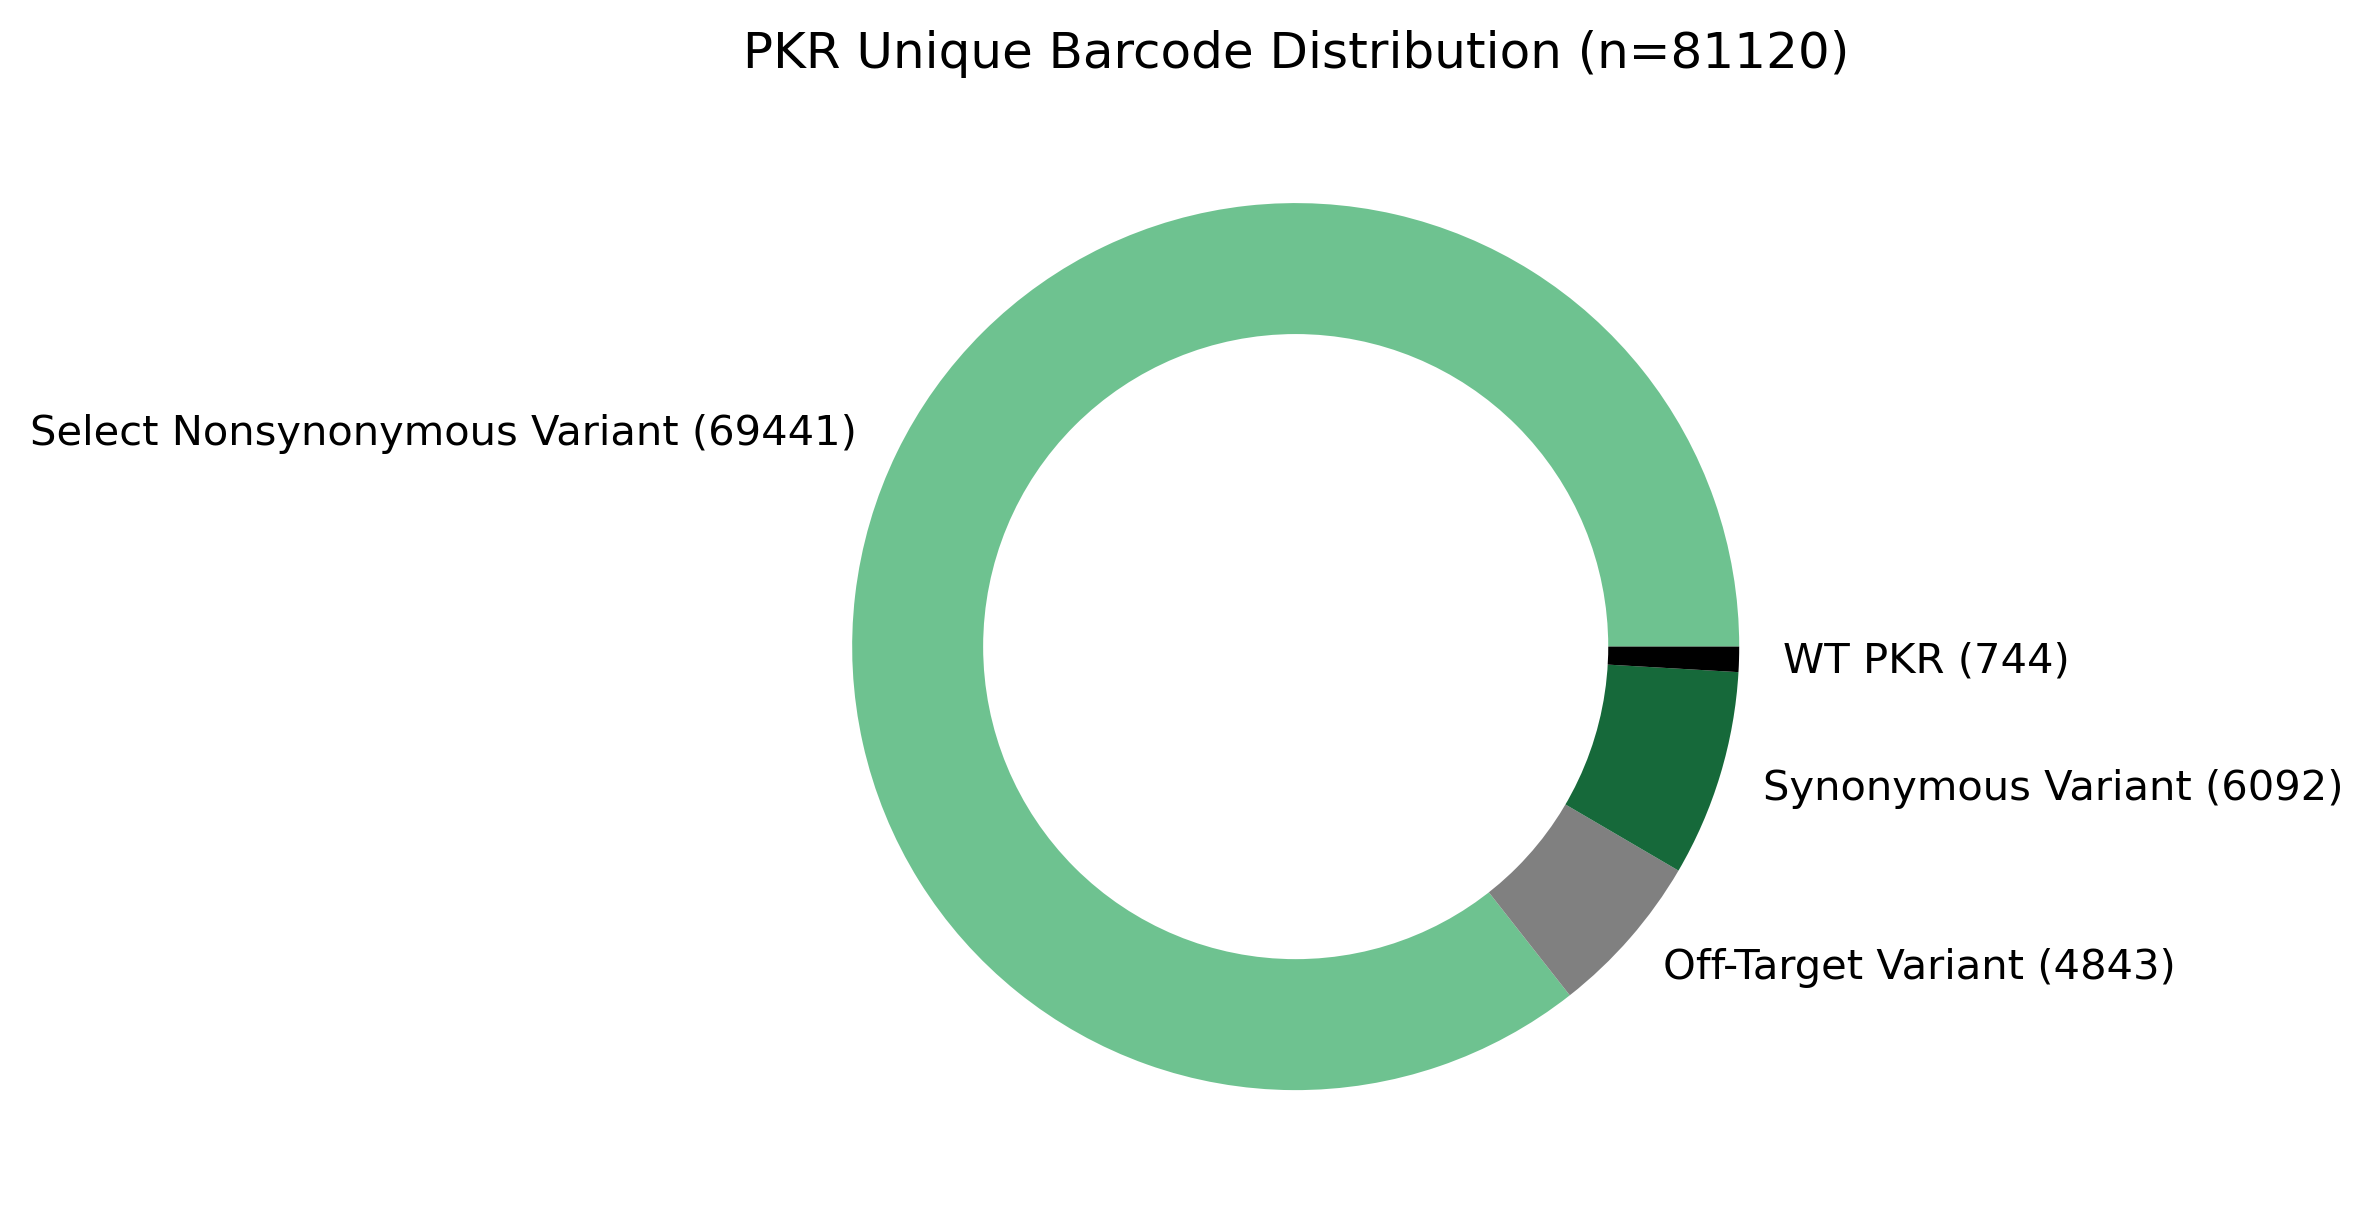

In [11]:
# PKR unique barcode distribution donut plot
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

names = [f'Select Nonsynonymous Variant ({intended_var_1_bc})', f'Off-Target Variant ({unintended_var_1_bc+var_n_bc})',f'Synonymous Variant ({syn_var_bc})', f'WT PKR ({wt_bc})']
size = [intended_var_1_bc, unintended_var_1_bc+var_n_bc, syn_var_bc, wt_bc]


# Create a circle at the center of the plot
ax = plt.Circle( (0,0), 0.7, color='white')

# Label color
plt.rcParams['text.color'] = 'black'
plt.pie(size, labels=names, colors = ['#6ec290', 'gray', '#16693a','black']) # light green = #8DB57F, PKR green = #6ec290, dark green = #16693a, red = #ee535b

p = plt.gcf()
p.gca().add_artist(ax)
plt.title(f'PKR Unique Barcode Distribution (n={sum(size)})')

fig = ax.get_figure()
fig.savefig(f'../img/pacbio_{protein}-donut/{protein}_barcode-distribution_donut_update.svg')
plt.show()
plt.close()

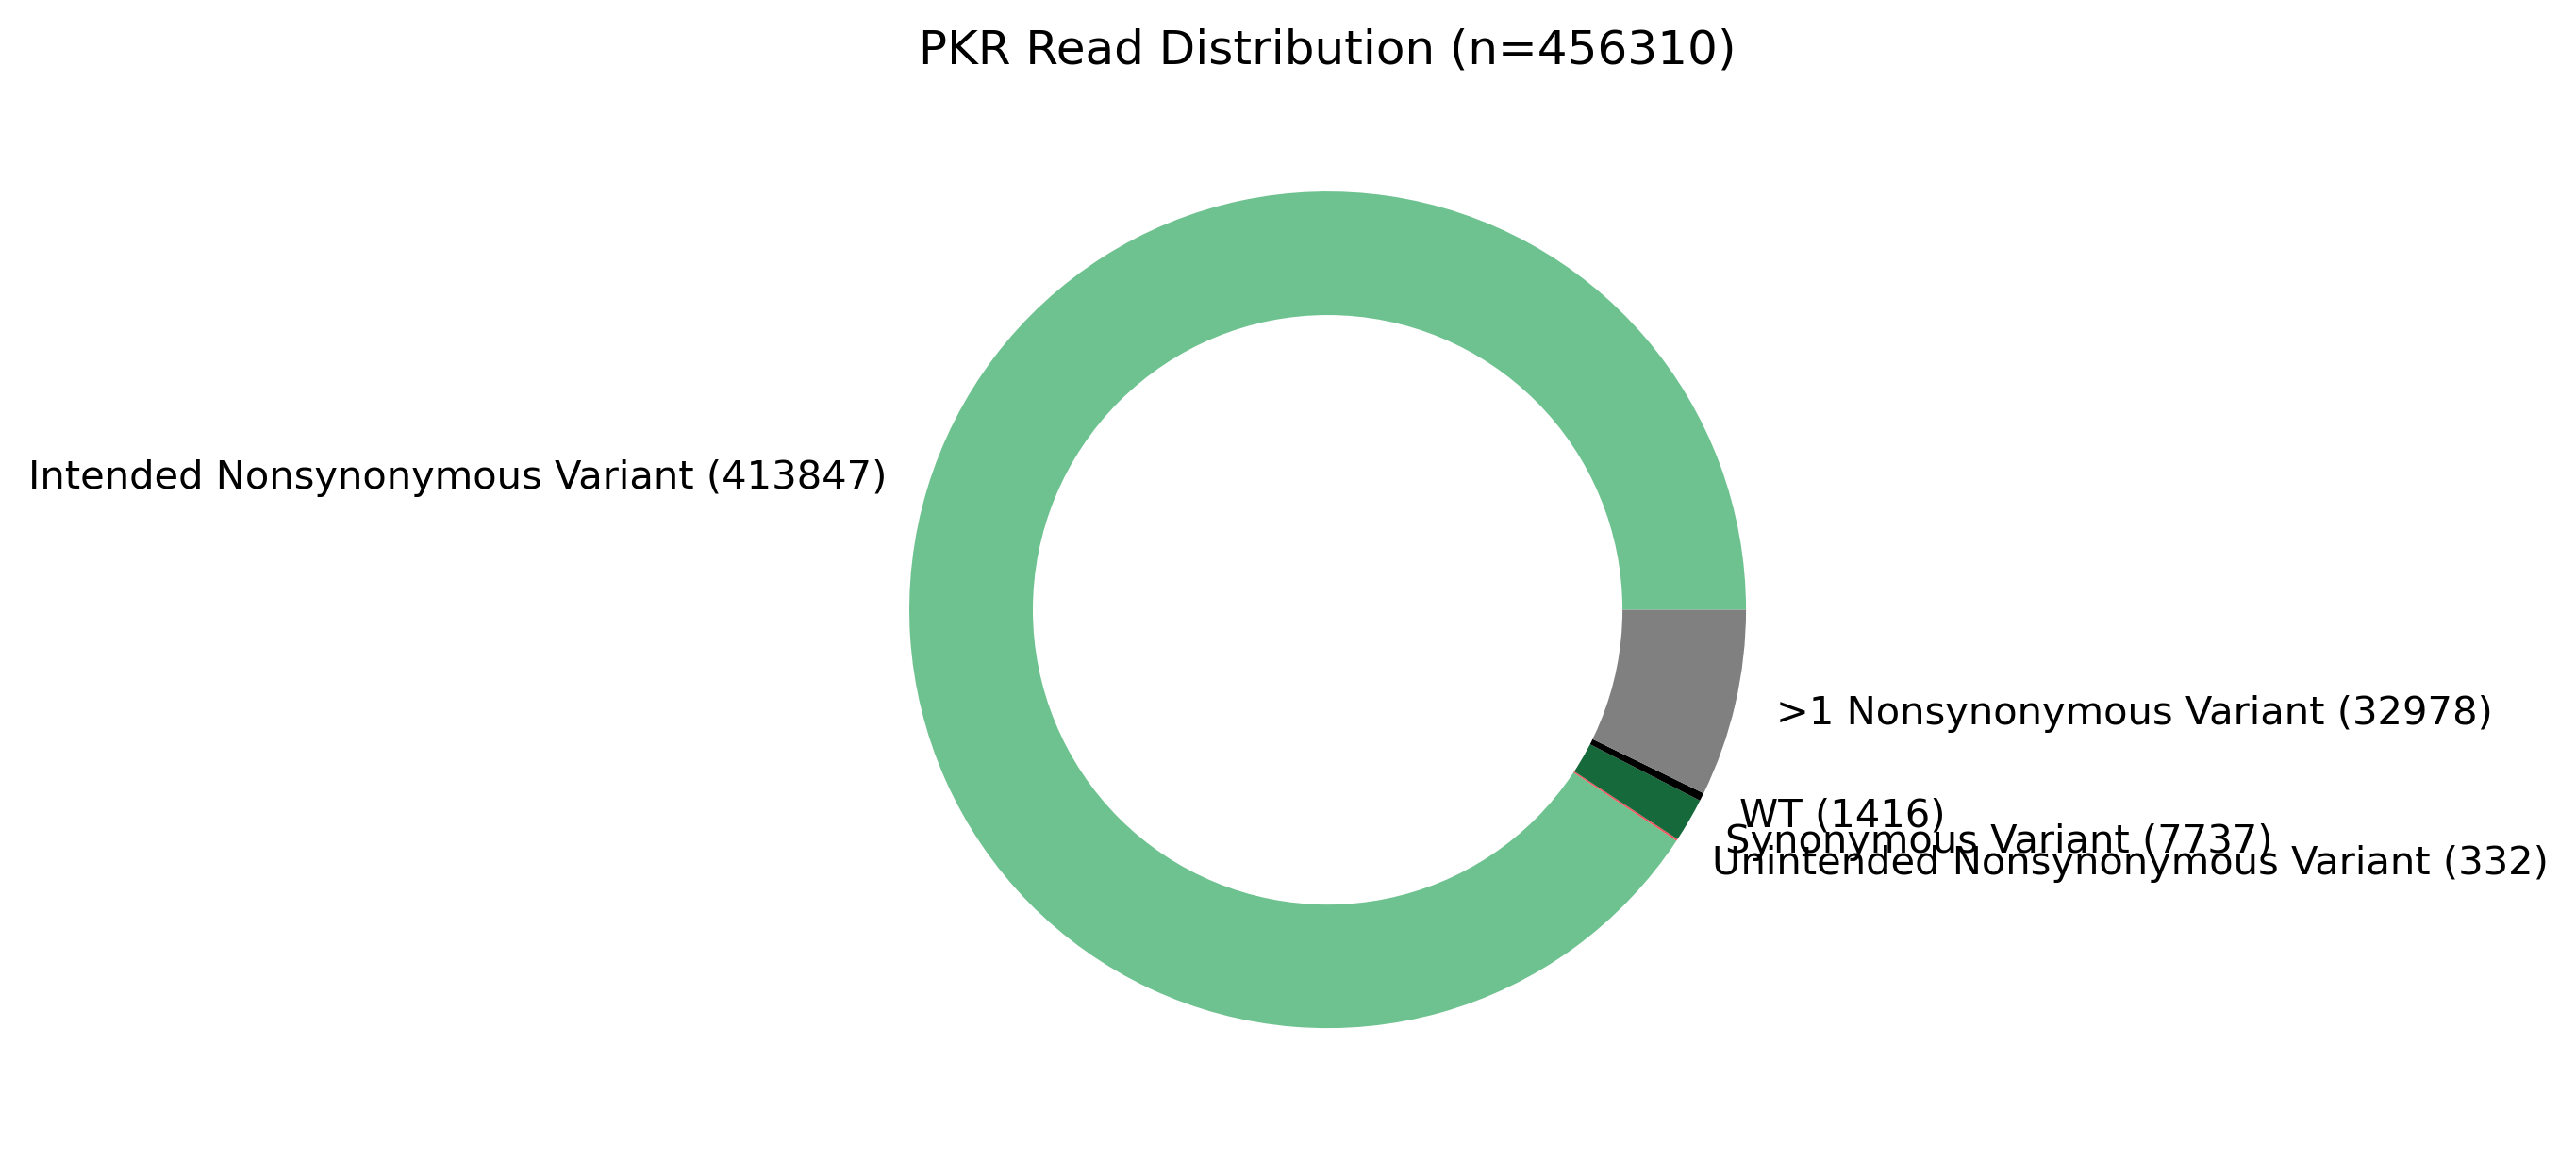

In [30]:
# PKR unique barcode distribution donut plot

names = [f'Intended Nonsynonymous Variant ({intended_var_1_reads})', f'Unintended Nonsynonymous Variant ({unintended_var_1_reads})',f'Synonymous Variant ({syn_var_reads})', f'WT ({wt_reads})', f'>1 Nonsynonymous Variant ({var_n_reads})']
size = [intended_var_1_reads, unintended_var_1_reads, syn_var_reads, wt_reads, var_n_reads]
 
# Create a circle at the center of the plot
ax = plt.Circle( (0,0), 0.7, color='white')

# Label color
plt.rcParams['text.color'] = 'black'
#plt.pie(size, labels=names, colors = ['#16693a', '#ee535b', '#95bf87','#6ec290','gray'])
plt.pie(size, labels=names, colors = ['#6ec290', '#ee535b', '#16693a','black','gray'])

p = plt.gcf()
p.gca().add_artist(ax)
plt.title(f'PKR Read Distribution (n={sum(size)})')

fig = ax.get_figure()
fig.savefig(f'../img/pacbio_{protein}-donut/{protein}_read-distribution_donut.svg')
plt.show()
plt.close()